<a href="https://colab.research.google.com/github/RupaliWaghamare/Deep_Learning/blob/main/Regression_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression_Keras

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step 1: Read the Dataset

In [ ]:
import pandas as pd
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df= pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Step 2: Perform basic data quality checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [ ]:
df.duplicated().sum()

41

In [ ]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [ ]:
df = df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


# Step 3: Seperate X and Y (PE)

> Add blockquote

> Add blockquote





In [ ]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [ ]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# Step 4: Preprocess X using pipeline

In [ ]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler())]).set_output(transform='pandas')

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


# Apply Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [ ]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [ ]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [ ]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [ ]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [ ]:
xtrain.shape

(7621, 4)

In [ ]:
xtest.shape

(1906, 4)

In [ ]:
xtrain.shape[1]

4

# Step 5: Build the neural network



# Hidden Layer use relu as activation function



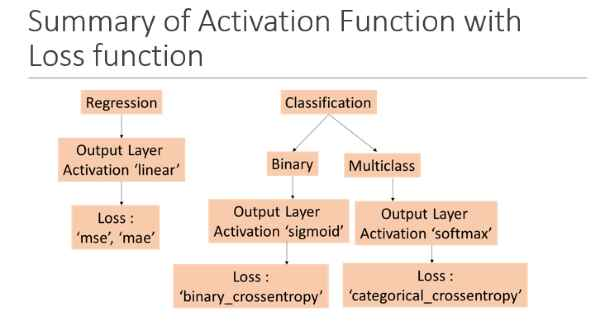

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [ ]:
# Intialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Dense Hidden Layer 1
model.add(Dense(16, activation='relu'))

# Add Hidden layer 2
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))

In [ ]:
# Compile the model
model.compile(loss="mse", metrics=["mae"], optimizer="adam")

In [ ]:
hist = model.fit(xtrain, ytrain,
                 validation_data=(xtest, ytest),
                 epochs=60)

Epoch 1/60
239/239 [==============================] - 4s 6ms/step - loss: 202558.1719 - mae: 449.7706 - val_loss: 193011.8906 - val_mae: 439.0875
Epoch 2/60
239/239 [==============================] - 1s 3ms/step - loss: 161061.4219 - mae: 399.6147 - val_loss: 115081.0859 - val_mae: 336.9142
Epoch 3/60
239/239 [==============================] - 1s 3ms/step - loss: 69108.0547 - mae: 247.2174 - val_loss: 33205.4609 - val_mae: 157.8890
Epoch 4/60
239/239 [==============================] - 1s 4ms/step - loss: 23657.1797 - mae: 130.2021 - val_loss: 17980.5508 - val_mae: 112.7817
Epoch 5/60
239/239 [==============================] - 1s 4ms/step - loss: 15716.4111 - mae: 105.5838 - val_loss: 12826.5195 - val_mae: 95.1872
Epoch 6/60
239/239 [==============================] - 1s 4ms/step - loss: 10756.6250 - mae: 87.3249 - val_loss: 8323.5879 - val_mae: 76.7469
Epoch 7/60
239/239 [==============================] - 1s 4ms/step - loss: 6632.3618 - mae: 68.4921 - val_loss: 4780.9141 - val_mae: 57.7

In [ ]:
hist.history["loss"]

[202558.171875,
 161061.421875,
 69108.0546875,
 23657.1796875,
 15716.4111328125,
 10756.625,
 6632.36181640625,
 3624.66259765625,
 1826.9908447265625,
 965.0392456054688,
 574.7915649414062,
 377.92974853515625,
 267.4063720703125,
 200.59188842773438,
 156.1908721923828,
 125.33561706542969,
 102.50071716308594,
 85.61829376220703,
 72.42481994628906,
 62.21333312988281,
 53.688812255859375,
 46.48065948486328,
 40.09091567993164,
 34.341800689697266,
 29.59734344482422,
 26.76566505432129,
 25.162742614746094,
 24.031667709350586,
 22.9539852142334,
 22.413671493530273,
 22.008459091186523,
 21.666648864746094,
 21.369844436645508,
 21.19341468811035,
 21.084856033325195,
 21.112703323364258,
 20.823101043701172,
 20.64217758178711,
 20.551393508911133,
 20.58595848083496,
 20.401498794555664,
 20.09773826599121,
 20.16516876220703,
 20.191448211669922,
 20.231016159057617,
 20.114139556884766,
 20.147199630737305,
 19.945852279663086,
 19.776962280273438,
 19.850934982299805,
 20

In [ ]:
hist.history['val_loss']

[193011.890625,
 115081.0859375,
 33205.4609375,
 17980.55078125,
 12826.51953125,
 8323.587890625,
 4780.9140625,
 2438.863037109375,
 1231.1357421875,
 696.748046875,
 442.28509521484375,
 309.20538330078125,
 224.6116180419922,
 173.14483642578125,
 136.2051544189453,
 110.61349487304688,
 91.58634185791016,
 76.77863311767578,
 65.24821472167969,
 56.025184631347656,
 49.046356201171875,
 41.58269119262695,
 35.370338439941406,
 30.473106384277344,
 26.945297241210938,
 25.2735538482666,
 23.788484573364258,
 22.94510841369629,
 22.22958755493164,
 21.703161239624023,
 21.673362731933594,
 21.085241317749023,
 21.096956253051758,
 20.965370178222656,
 20.386825561523438,
 20.903057098388672,
 20.15614128112793,
 20.09882354736328,
 19.991886138916016,
 20.377946853637695,
 20.204374313354492,
 20.191747665405273,
 19.98067283630371,
 19.72612762451172,
 19.542606353759766,
 22.782421112060547,
 20.332794189453125,
 19.965442657470703,
 20.356916427612305,
 19.87324333190918,
 19.50

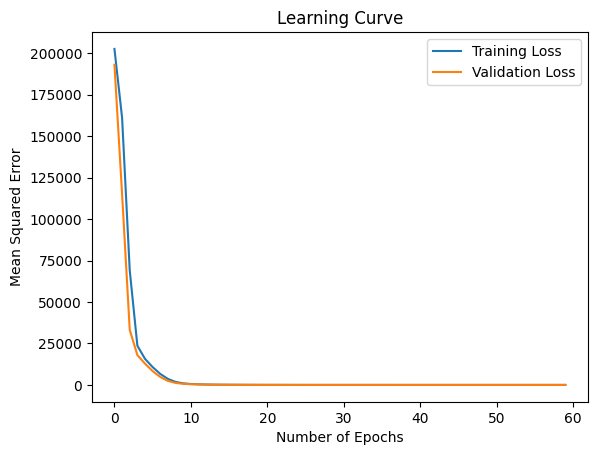

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [ ]:
model.evaluate(xtrain, ytrain)

239/239 [==============================] - 1s 2ms/step - loss: 18.8071 - mae: 3.4147


[18.807086944580078, 3.414746046066284]

In [ ]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 2ms/step - loss: 18.7523 - mae: 3.4450


[18.75228500366211, 3.444992780685425]